## **2 модуль**

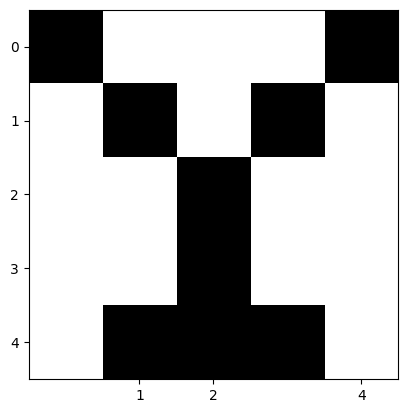

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generateRandomSprite():
    sprite = np.random.randint(0, 2, (5, 5))
    symSprite = np.zeros((5, 5))

    for x in range(5):
        for y in range(5):
            symSprite[x, y] = sprite[x, y] * sprite[x, 4-y]

    return symSprite

sprite = generateRandomSprite()

plt.imshow(sprite, cmap='binary', interpolation='nearest')
plt.xticks([1, 2, 4])
plt.show()

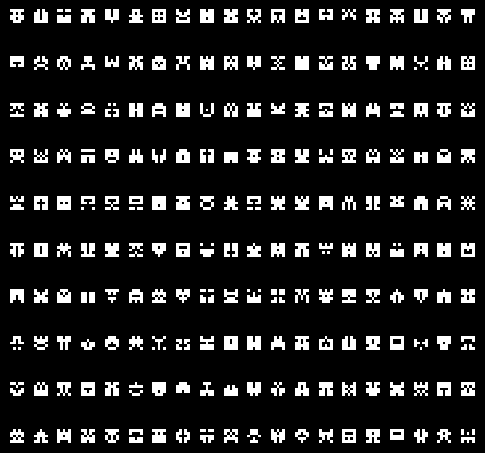

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generateRandomSprite():
    sprite = np.random.randint(0, 2, (5, 5))
    symSprite = np.zeros((5, 5))

    for x in range(5):
        for y in range(5):
            symSprite[x, y] = sprite[x, y] * sprite[x, 4-y]

    return symSprite

num_sprites = 200
sprites = [generateRandomSprite() for _ in range(num_sprites)]

fig, axs = plt.subplots(10, 20, figsize=(6, 6))
fig.patch.set_facecolor('black')

for i in range(num_sprites):
    ax = axs[i // 20, i % 20]
    ax.imshow(sprites[i], cmap='binary', interpolation='nearest')
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('black')

plt.subplots_adjust(wspace=0.7, hspace=0.1)
plt.show()

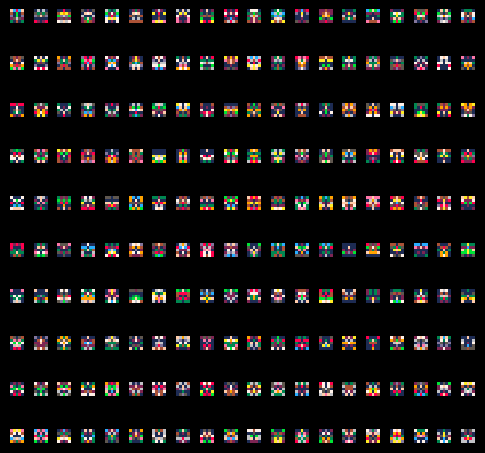

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pico8_palette = [
    "#1D2B53", "#7E2553", "#008751", "#AB5236",
    "#5F574F", "#C2C3C7", "#FFF1E8", "#FF004D",
    "#FFA300", "#FFEC27", "#00E436", "#29ADFF",
    "#83769C", "#FF77A8", "#FFCCAA"
]

def generateRandomSprite():
    sprite = np.random.randint(0, len(pico8_palette), (5, 5))
    symSprite = np.zeros((5, 5))

    for x in range(5):
        for y in range(5):
            symSprite[x, y] = sprite[x, y] * sprite[x, 4-y]

    return symSprite

num_sprites = 200
sprites = [generateRandomSprite() for _ in range(num_sprites)]
cmap = ListedColormap(pico8_palette)

fig, axs = plt.subplots(10, 20, figsize=(6, 6))
fig.patch.set_facecolor('black')

for i in range(num_sprites):
    ax = axs[i // 20, i % 20]
    ax.imshow(sprites[i], cmap=cmap, interpolation='nearest')
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('black')

plt.subplots_adjust(wspace=0.7, hspace=0.1)
plt.show()

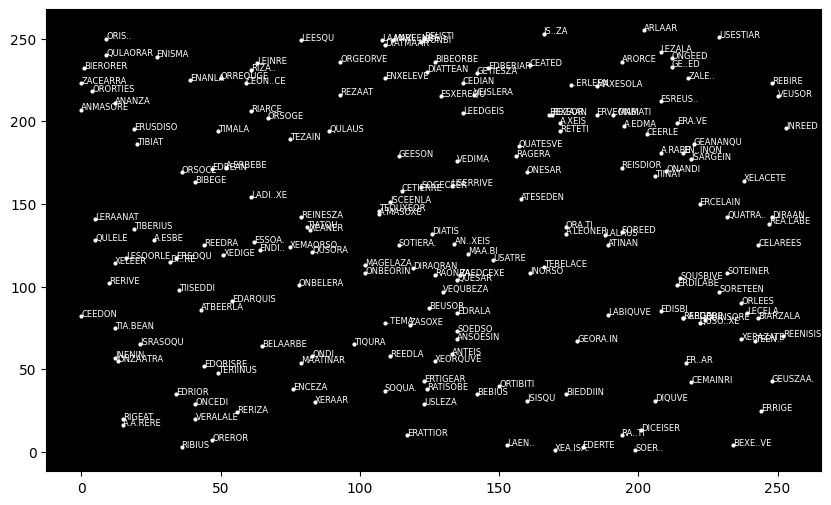

In [44]:
import random
import matplotlib.pyplot as plt

def tweak_seed(s):
    temp = s['w0'] + s['w1'] + s['w2']
    s['w0'], s['w1'], s['w2'] = s['w1'], s['w2'], temp

def make_system(s):
    pairs = "..LEXEGEZACEBISOUSESARMAINDIREA.ERATENBERALAVETIEDORQUANTEISRION"
    longnameflag = s['w0'] & 64

    thissys = {}
    thissys['x'] = s['w1'] >> 8
    thissys['y'] = s['w0'] >> 8

    thissys['govtype'] = (s['w1'] >> 3) & 7
    thissys['economy'] = (s['w0'] >> 8) & 7
    if thissys['govtype'] <= 1:
        thissys['economy'] |= 2

    thissys['techlev'] = ((s['w1'] >> 8) & 3) + (thissys['economy'] ^ 7)
    thissys['techlev'] += thissys['govtype'] >> 1
    if thissys['govtype'] & 1 == 1:
        thissys['techlev'] += 1

    thissys['population'] = 4 * thissys['techlev'] + thissys['economy'] + thissys['govtype'] + 1
    thissys['productivity'] = ((thissys['economy'] ^ 7) + 3) * (thissys['govtype'] + 4) * thissys['population'] * 8

    thissys['radius'] = 256 * (((s['w2'] >> 8) & 15) + 11) + thissys['x']

    pair1 = 2 * ((s['w2'] >> 8) & 31)
    tweak_seed(s)
    pair2 = 2 * ((s['w2'] >> 8) & 31)
    tweak_seed(s)
    pair3 = 2 * ((s['w2'] >> 8) & 31)
    tweak_seed(s)
    pair4 = 2 * ((s['w2'] >> 8) & 31)
    tweak_seed(s)

    thissys['name'] = pairs[pair1:pair1 + 2] + pairs[pair2:pair2 + 2] + pairs[pair3:pair3 + 2]
    if longnameflag:
        thissys['name'] += pairs[pair4:pair4 + 2]

    return thissys

random.seed(42)
random_systems = []
for _ in range(200):
    random_system = {
        'w0': random.randint(0, 65535),
        'w1': random.randint(0, 65535),
        'w2': random.randint(0, 65535)
    }
    random_systems.append(make_system(random_system))

plt.figure(figsize=(10, 6))
for system in random_systems:
    plt.plot(system['x'], system['y'], 'wo', markersize=2)
    plt.text(system['x'], system['y'], system['name'], color='white', fontsize=6)

plt.gca().set_facecolor('black')
plt.show()

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Tree:
    def __init__(self, width, height, num_attraction_points, max_iterations):
        self.width = width
        self.height = height
        self.num_attraction_points = num_attraction_points
        self.max_iterations = max_iterations
        self.attraction_points = [Point(np.random.uniform(0, width), np.random.uniform(0, height)) for _ in range(num_attraction_points)]
        self.nodes = [Point(np.random.uniform(0, width), 0)]  # Initial node at the bottom
        self.iteration = 0

    def attract_nodes(self):
        for node in self.nodes:
            closest_point = min(self.attraction_points, key=lambda p: np.sqrt((p.x - node.x) ** 2 + (p.y - node.y) ** 2))
            dx = closest_point.x - node.x
            dy = closest_point.y - node.y
            magnitude = np.sqrt(dx ** 2 + dy ** 2)
            if magnitude > 0:
                node.x += dx / magnitude * np.random.uniform(0.1, 0.5)
                node.y += dy / magnitude * np.random.uniform(0.1, 0.5)

    def grow(self):
        while self.iteration < self.max_iterations:
            self.attract_nodes()
            new_nodes = []
            for node in self.nodes:
                if node.y < self.height:
                    new_node = Point(node.x, node.y + np.random.uniform(0.1, 1))
                    new_nodes.append(new_node)
            self.nodes.extend(new_nodes)
            self.iteration += 1

    def draw(self):
        segments = []
        for i in range(len(self.nodes) - 1):
            segments.append([(self.nodes[i].x, self.nodes[i].y), (self.nodes[i + 1].x, self.nodes[i + 1].y)])

        fig, ax = plt.subplots()
        ax.set_xlim(0, self.width)
        ax.set_ylim(0, self.height)
        ax.set_aspect('equal')
        lc = LineCollection(segments, linewidths=0.5)
        ax.add_collection(lc)
        plt.show()

width = 10
height = 20
num_attraction_points = 3
max_iterations = 50

tree = Tree(width, height, num_attraction_points, max_iterations)
tree.grow()
tree.draw()

KeyboardInterrupt: 

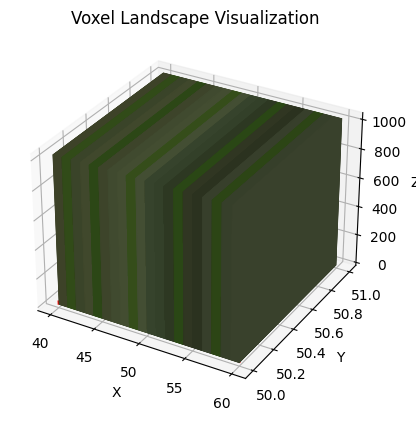

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

def load_texture_and_height_map(texture_path, height_map_path):
    texture = np.array(Image.open(texture_path)) / 255.0  # Конвертируем в диапазон от 0 до 1
    height_map = np.array(Image.open(height_map_path).convert('L')) / 255.0  # Преобразуем в оттенки серого и конвертируем в диапазон от 0 до 1
    return texture, height_map

def visualize_voxel_landscape(texture, height_map, camera_position, screen_width, view_depth):
    # Определяем размеры текстуры
    texture_height, texture_width, _ = texture.shape

    # Определяем координаты камеры и область обзора
    camera_x, camera_y = camera_position
    left_view_bound = max(0, camera_x - screen_width // 2)
    right_view_bound = min(texture_width, camera_x + screen_width // 2)

    # Создаем фигуру для визуализации
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Проходимся по слоям сзади наперед
    for z in range(height_map.shape[0] - 1, -1, -1):
        # Проходимся по каждой горизонтальной линии
        for x in range(left_view_bound, right_view_bound):
            # Извлекаем цвет из текстуры
            texture_color = texture[camera_y, x]

            # Извлекаем высоту из карты высот
            height = height_map[z, x]

            # Определяем координаты вершин для столбца
            X = [x, x + 1, x + 1, x, x]
            Y = [camera_y, camera_y, camera_y + 1, camera_y + 1, camera_y]
            Z = [z, z, z, z, z]

            # Добавляем столбец визуализации
            ax.plot_trisurf(X, Y, Z, color=texture_color)

    # Отображаем область обзора
    ax.plot([left_view_bound, left_view_bound], [camera_y, camera_y], [0, view_depth], color='r', linestyle='--')
    ax.plot([right_view_bound, right_view_bound], [camera_y, camera_y], [0, view_depth], color='r', linestyle='--')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Voxel Landscape Visualization')
    plt.show()

# Загрузка текстуры и карты высот из PNG изображений
texture_path = '/texture.png'
height_map_path = '/heightmap.png'
texture, height_map = load_texture_and_height_map(texture_path, height_map_path)

# Координаты камеры
camera_position = (50, 50)
# Ширина экрана и глубина обзора
screen_width = 20
view_depth = 30

# Визуализация
visualize_voxel_landscape(texture, height_map, camera_position, screen_width, view_depth)


## **3 модуль**

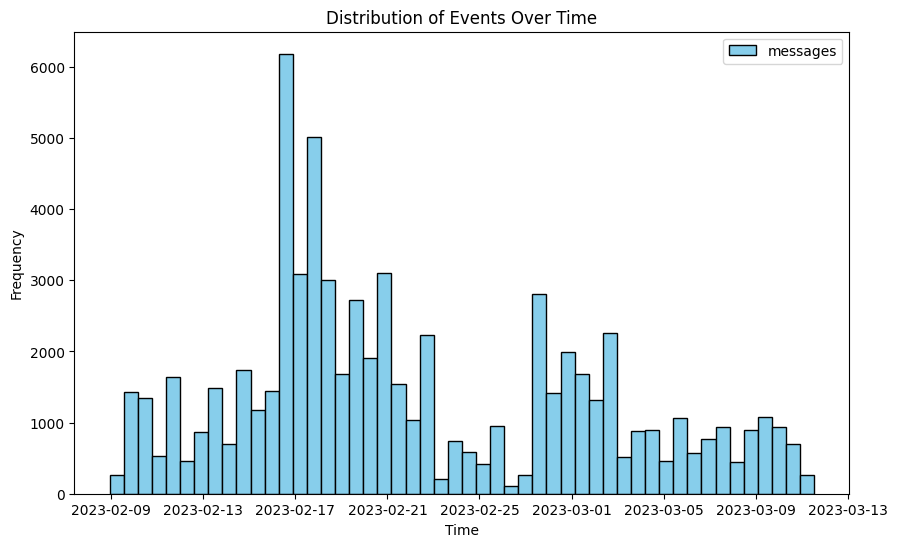

In [56]:
import csv
import datetime
import matplotlib.pyplot as plt

def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')

def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))

# Загрузка данных из CSV-файлов
messages = load_csv('/messages.csv')
checks = load_csv('/checks.csv')
statuses = load_csv('/statuses.csv')

# Преобразование времени в объект datetime
messages = [(int(row[0]), row[1], row[2], row[3], parse_time(row[4])) for row in messages[1:]]
checks = [(int(row[0]), int(row[1]), parse_time(row[2]), row[3]) for row in checks[1:]]
statuses = [(row[0], row[1], row[2], parse_time(row[3]), row[4], row[5]) for row in statuses[1:]]

# Пример построения графика
# Здесь предполагается, что вы хотите построить график по времени.
# Вы можете изменить это в соответствии с вашими потребностями.

# Создание списка временных меток для графика
time_points = [entry[4] for entry in messages] + [entry[2] for entry in checks] + [entry[3] for entry in statuses]

# Создание списка меток для графика
labels = ['messages' for _ in messages] + ['checks' for _ in checks] + ['statuses' for _ in statuses]

# Построение графика
plt.figure(figsize=(10, 6))
plt.hist(time_points, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Events Over Time')
plt.legend(['messages', 'checks', 'statuses'])
plt.show()